In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder ,Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [151]:
data = pd.read_csv('iris.csv')

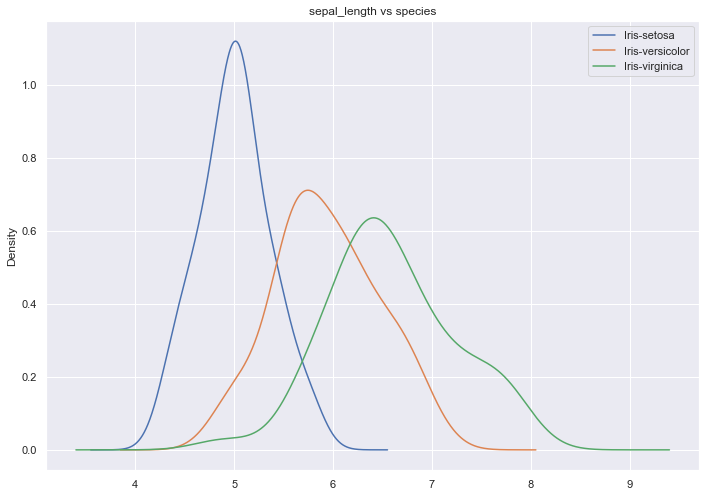

In [127]:
for i in ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] :
    data.SepalLengthCm[data.Species==i].plot(kind='kde')
pt.title("sepal_length vs species")
pt.legend(("Iris-setosa","Iris-versicolor","Iris-virginica"))

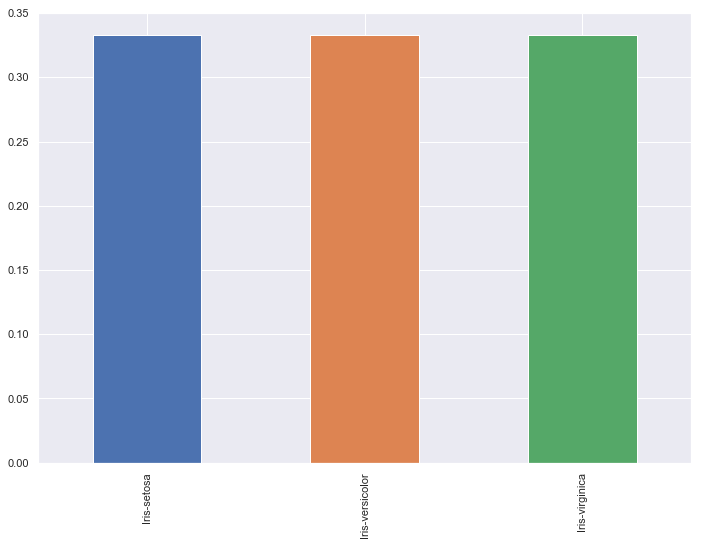

In [65]:
data.Species.value_counts(normalize=True).plot(kind="bar")

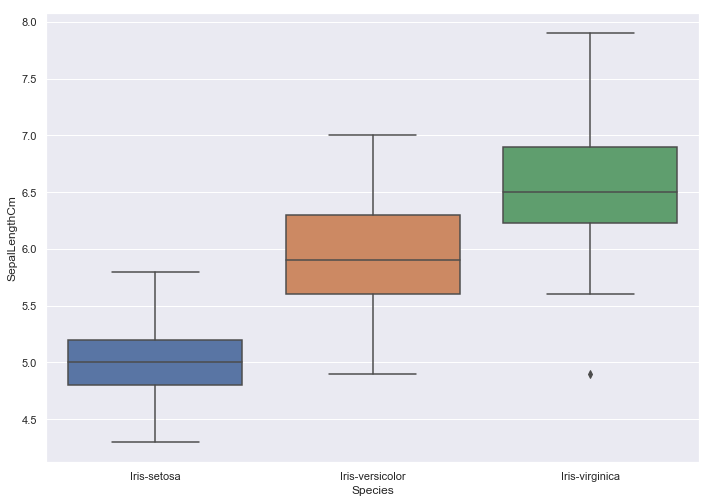

In [128]:
sns.boxplot(x='Species', y='SepalLengthCm', data=data)

In [67]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [160]:
labelencoder = LabelEncoder()
Y=labelencoder.fit_transform(Y)

In [153]:
X = data.iloc[:,1:5]

In [155]:
Y = data.iloc[:,5:6]

In [136]:
from sklearn.model_selection import train_test_split

In [164]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [165]:
from sklearn.preprocessing import StandardScaler
Sc_x=StandardScaler()
x_train=Sc_x.fit_transform(x_train)

In [166]:
from sklearn.preprocessing import StandardScaler
Sc_x=StandardScaler()
x_test=Sc_x.fit_transform(x_test)

In [184]:
from sklearn.svm import SVC  
classifier = SVC(kernel='linear',C=10)  
classifier.fit(x_train, y_train) 

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [168]:
parameters = [{'C':[1,10,100],'kernel':['linear']},{'C':[1,10,100],'kernel':['rbf'],'gamma':[0.25,0.5,0.15]}]

In [169]:
gridsearch = GridSearchCV(estimator=classifier,  
                     param_grid=parameters,
                     scoring='accuracy',
                     cv=10,)

In [170]:
gridsearch=gridsearch.fit(x_train,y_train) 
best_result = gridsearch.best_score_
best_parameters = gridsearch.best_params_

C:\Users\Admin\AppData\Local\conda\conda\envs\spyder\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [171]:
best_parameters

{'C': 10, 'kernel': 'linear'}

In [172]:
best_result

0.975

In [186]:
y_predict = classifier.predict(x_test)

In [187]:
 from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)

In [189]:
 from sklearn import metrics
print(metrics.accuracy_score(y_test,y_predict))

0.8333333333333334
